In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/home/wschertzer3/aem_aging/raw_data/aem_aging_3_18_25.csv')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

In [3]:
df_exp_IEC = df.dropna(subset=['EXP_IEC']).copy()  # Select rows where EXP_IEC is not NaN
df_exp_IEC['prop'] = 'EXP_IEC'  # Set prop to EXP_IEC
df_exp_IEC['value'] = df_exp_IEC['EXP_IEC']  # Set value to the EXP_IEC values

# Drop the original EXP_IEC column
df_exp_IEC = df_exp_IEC.drop(columns=['EXP_IEC'])

# Append the new rows to the original dataframe
df_transformed = pd.concat([df, df_exp_IEC], ignore_index=True)

# Drop the original EXP_IEC column from the original dataframe
df_transformed = df_transformed.drop(columns=['EXP_IEC'])

In [4]:
df = df_transformed.drop_duplicates().reset_index(drop=True)


In [5]:
unique_smiles = pd.unique(df[['smiles1', 'smiles2', 'smiles3']].values.ravel())
num_unique_smiles = len(unique_smiles)
print("Number of unique smiles:", num_unique_smiles)
len(unique_smiles)

Number of unique smiles: 217


217

In [6]:
unique_monomer_combos = df[['smiles1', 'smiles2', 'smiles3']].drop_duplicates()
num_unique_monomer_combos = len(unique_monomer_combos)
print("Number of unique SMILES combinations:", num_unique_monomer_combos)


Number of unique SMILES combinations: 162


In [7]:
unique_monomer_sets = df[['smiles1', 'smiles2', 'smiles3', 'c1', 'c2', 'c3']].drop_duplicates()
num_unique_monomer_sets = len(unique_monomer_sets)
print("Number of unique SMILES+concentration combinations:", num_unique_monomer_sets)


Number of unique SMILES+concentration combinations: 303


In [8]:
import pandas as pd

# Flatten all additive names into a single series, excluding NaN and empty strings
all_additives = df[['additive_name_1', 'additive_name_2']].values.ravel()
all_additives = pd.Series(all_additives).dropna()
all_additives = all_additives[all_additives != '']

# Count how many times each additive appears
additive_counts = all_additives.value_counts()

# Convert counts to percentage of total additive occurrences
additive_percentage = (additive_counts / additive_counts.sum()) * 100

print("Percentage of dataset associated with each additive:")
print(additive_percentage)
additive_percentage.to_csv('unique_additives.csv')



Percentage of dataset associated with each additive:
1-vinyl-propyltriethoxysilane-imidazolium    12.580300
glutaraldehyde                               10.599572
halloysite_nanotube                          10.599572
PAGE                                          9.582441
PEG                                           9.582441
ZrO2                                          9.154176
Im-phenyl-Silsesquioxane                      5.674518
diethanediol                                  5.406852
phenyl-Silsesquioxane                         4.282655
hexanedithiol                                 3.961456
QA-Silsesquioxane                             3.961456
Polyvinylbenzyl chloride                      3.693790
Polyvinyl Imidazolium                         3.693790
*CC*                                          3.319058
octanedithiol                                 2.997859
PE                                            0.910064
Name: count, dtype: float64


In [9]:
unique_monomer_sets = df[['smiles1', 'smiles2', 'smiles3', 'c1', 'c2', 'c3', 'additive_name_1', 'additive_name_2', 'additivec1', 'additivec2', 'additivec3']].drop_duplicates()
num_unique_monomer_sets = len(unique_monomer_sets)
print("Number of unique SMILES+concentration+additive+additive concentration combinations:", num_unique_monomer_sets)

Number of unique SMILES+concentration+additive+additive concentration combinations: 347


In [10]:
num_unique_backbones = df['Backbone'].nunique()
print("Number of unique backbones:", num_unique_backbones)

Number of unique backbones: 47


In [11]:
# Count how many rows correspond to each backbone
backbone_counts = df['Backbone'].value_counts()

# Calculate the percentage that each backbone contributes to the total data
backbone_percentage = (backbone_counts / backbone_counts.sum()) * 100

print(backbone_percentage)
backbone_percentage.to_csv('backbone_variety.csv')


Backbone
PPO                                                                                                           18.596104
PAES                                                                                                          14.241088
PEEK                                                                                                           5.549430
PE                                                                                                             5.310548
polypropylene                                                                                                  4.649026
Polystyrene-acrylonitrile-(1-vinyl-3-butylimidazolium bromide)-(1-vinyl-propyltriethoxysilane-imidazolium)     4.318265
Chitosan                                                                                                       3.987505
PAEK                                                                                                           3.546490
Polysulfone                    

In [12]:
# Count how many rows correspond to each backbone
cation_counts = df['Cation'].value_counts()

# Calculate the percentage that each backbone contributes to the total data
cation_percentage = (cation_counts / cation_counts.sum()) * 100

print(cation_percentage)
cation_percentage.to_csv('cation_variety.csv')

Cation
TMA                                              53.614902
Im                                               20.029509
propyltriethoxysilane-Im, butylimidazolium-Im     4.334194
DMHDA                                             2.858724
Benzylmethyl                                      2.360752
TMHA                                              2.010328
undecene                                          1.899668
cobaltocenium                                     1.862781
bis(phenyltrimethylammonium) (PTMA)               1.143489
Piperidinium                                      0.977499
spirocyclic-TMA-backbone                          0.940612
heptafluorobutylamine                             0.885282
Buytylamine                                       0.885282
COC5H10-Im                                        0.682405
QTPM                                              0.663962
CH2-Im                                            0.645518
TMA-QPOSS-3                                      

In [13]:
prop_counts = df['prop'].value_counts()
print(prop_counts)
prop_counts.to_csv


prop
OHCond(mS/cm)                           2229
EXP_IEC                                 1485
WU(wt%)                                  627
Swelling(%)                              521
TS(MPa)                                  171
EB(%)                                    163
IEC                                      139
YM(MPa)                                   73
Tm                                         4
Methanol Permeability (10^-7 cm2s-1)       3
Hydration Number                           3
Td                                         3
Methanol Uptake                            3
x                                          1
HCond(S/cm)                                1
Name: count, dtype: int64


<bound method NDFrame.to_csv of prop
OHCond(mS/cm)                           2229
EXP_IEC                                 1485
WU(wt%)                                  627
Swelling(%)                              521
TS(MPa)                                  171
EB(%)                                    163
IEC                                      139
YM(MPa)                                   73
Tm                                         4
Methanol Permeability (10^-7 cm2s-1)       3
Hydration Number                           3
Td                                         3
Methanol Uptake                            3
x                                          1
HCond(S/cm)                                1
Name: count, dtype: int64>

In [14]:
import pandas as pd

# Total number of rows
total_rows = len(df)

# 1. Percentage of the entire dataset for each property
prop_counts = df['prop'].value_counts()
prop_percentages = (prop_counts / total_rows) * 100
print("Percentage of dataset by property:")
print(prop_percentages)
prop_percentages.to_csv('prop_percentages.csv')

# 2. Determine time-dependent fraction for each property
# Group by Sample and prop to see how many distinct time points exist
time_groups = df.groupby(['Sample', 'prop'])['time(h)'].nunique()

# Identify which (Sample, prop) combos have more than one time point
time_dependent = time_groups[time_groups > 1].index

# Filter the original df to only rows from these time-dependent (Sample, prop) combos
time_dependent_rows = df.set_index(['Sample', 'prop']).loc[time_dependent].reset_index()

# Count how many rows per property are time-dependent
time_dependent_counts = time_dependent_rows['prop'].value_counts()

# Calculate the fraction or percentage of each property that is time-dependent
time_dependent_fraction = time_dependent_counts / prop_counts * 100

# Ensure the order matches the order of prop_percentages
time_dependent_fraction = time_dependent_fraction.reindex(prop_percentages.index).fillna(0)

print("\nPercentage of each property's data that is time-dependent:")
print(time_dependent_fraction)
time_dependent_fraction.to_csv('time_dependent_fraction.csv')



Percentage of dataset by property:
prop
OHCond(mS/cm)                           40.779363
EXP_IEC                                 27.167947
WU(wt%)                                 11.470911
Swelling(%)                              9.531650
TS(MPa)                                  3.128430
EB(%)                                    2.982071
IEC                                      2.542993
YM(MPa)                                  1.335529
Tm                                       0.073180
Methanol Permeability (10^-7 cm2s-1)     0.054885
Hydration Number                         0.054885
Td                                       0.054885
Methanol Uptake                          0.054885
x                                        0.018295
HCond(S/cm)                              0.018295
Name: count, dtype: float64

Percentage of each property's data that is time-dependent:
prop
OHCond(mS/cm)                           51.188874
EXP_IEC                                 31.515152
WU(wt%)          

In [15]:
time_dependent_samples = (time_groups > 1).sum()
print("Number of samples with multiple time points:", time_dependent_samples)


Number of samples with multiple time points: 161


In [16]:
time_dependent = time_groups[time_groups > 1].index
time_dependent_rows = df.set_index(['Sample', 'prop']).loc[time_dependent].reset_index()
len(time_dependent_rows)

1803

In [17]:
num_unique_solvents = df['solvent'].nunique()
print("Number of unique solvents:", num_unique_solvents)


Number of unique solvents: 2


In [18]:
num_unique_solvent_conc = df['solvent_conc(M)'].unique()
print("Number of unique solvent concentrations:", num_unique_solvent_conc)


Number of unique solvent concentrations: [ 0.  4. nan  3.  1. 10.  8.  2.  5.  7.  6. 15.]


In [19]:
# Define 'has_additive' based on additive concentrations only
df['has_additive'] = ~((df['additivec1'] == 0) & (df['additivec2'] == 0) & (df['additivec3'] == 0))

# Count how many samples have additives and how many do not
num_with_additive = df['has_additive'].sum()
num_without_additive = len(df) - num_with_additive

print("Number of samples with additive:", num_with_additive)
print("Number of samples without additive:", num_without_additive)


Number of samples with additive: 1313
Number of samples without additive: 4153


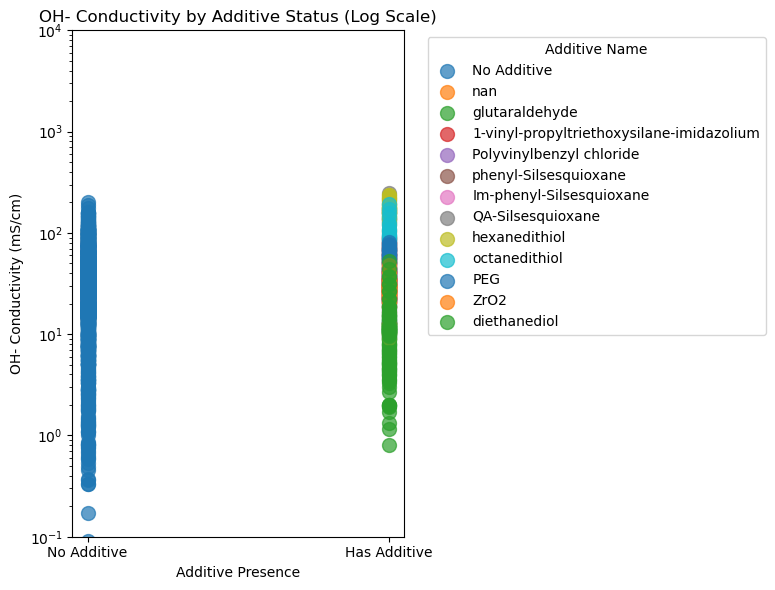

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter to only OH- conductivity data
cond_df = df[df['prop'] == 'OHCond(mS/cm)'].copy()
cond_df = cond_df[cond_df['value'] <= 250]

# Define a categorical variable for plotting on the x-axis
cond_df['AdditiveStatus'] = np.where(cond_df['has_additive'], 'Has Additive', 'No Additive')

# Create a label for additives:
cond_df['AdditiveLabel'] = cond_df.apply(
    lambda row: 'No Additive' if not row['has_additive'] else str(row['additive_name_1']), axis=1
)

# Get the unique additive labels for color mapping
unique_additives = cond_df['AdditiveLabel'].unique()
color_map = {name: plt.cm.tab10(i % 10) for i, name in enumerate(unique_additives)}

# Map the AdditiveStatus to closer numeric x positions
x_map = {'No Additive': 0, 'Has Additive': 0.3}

plt.figure(figsize=(8, 6))

# Plot each additive category separately for distinct colors and larger markers
for label in unique_additives:
    subset = cond_df[cond_df['AdditiveLabel'] == label]
    x_vals = subset['AdditiveStatus'].map(x_map)
    plt.scatter(x_vals, subset['value'], c=[color_map[label]], label=label, alpha=0.7, s=100)

# Set x-axis ticks to reflect new positions
plt.xticks([0, 0.3], ['No Additive', 'Has Additive'])

# Set y-axis to log scale and specify range
plt.yscale('log')
plt.ylim([1e-1, 1e4])

plt.xlabel('Additive Presence')
plt.ylabel('OH- Conductivity (mS/cm)')
plt.title('OH- Conductivity by Additive Status (Log Scale)')

# Add a legend
plt.legend(title='Additive Name', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()




In [21]:
cond_df[cond_df['value'] > 200]

,Backbone,Cation,Sample,smiles1,smiles2,smiles3,c1,c2,c3,additive_name_1,...,RH(%),lw,Temp(C),prop,time(h),value,DOI,has_additive,AdditiveStatus,AdditiveLabel
1441,PPO,TMA-QPOSS-5,NaN,Cc1cc(*)cc(C[N+](C)(C)C)c1O*.[Br-],Cc1cc(*)cc(C)c1O*,*CC*,37.0,63.0,0.0,QA-Silsesquioxane,...,100.0,1.0,80.0,OHCond(mS/cm),500.0,212.25,https://doi.org/10.1016/j.memsci.2019.117314,True,Has Additive,QA-Silsesquioxane
1442,PPO,TMA-QPOSS-3,NaN,Cc1cc(*)cc(C[N+](C)(C)C)c1O*.[Br-],Cc1cc(*)cc(C)c1O*,*CC*,37.0,63.0,0.0,QA-Silsesquioxane,...,100.0,1.0,80.0,OHCond(mS/cm),200.0,246.31,https://doi.org/10.1016/j.memsci.2019.117314,True,Has Additive,QA-Silsesquioxane
1512,Polynorbornene,TMA,v-2-H-1,*C(C1CC(CCCC[N+](C)(C)C)C2C1)C2*.[Br-],*C(C1CC(C=C)C2C1)C2*,*CC*,67.0,33.0,0.0,hexanedithiol,...,100.0,1.0,25.0,OHCond(mS/cm),720.0,204.92,https://doi.org/10.1016/j.memsci.2023.121916,True,Has Additive,hexanedithiol
1513,Polynorbornene,TMA,v-2-H-1,*C(C1CC(CCCC[N+](C)(C)C)C2C1)C2*.[Br-],*C(C1CC(C=C)C2C1)C2*,*CC*,67.0,33.0,0.0,hexanedithiol,...,100.0,1.0,25.0,OHCond(mS/cm),600.0,215.44,https://doi.org/10.1016/j.memsci.2023.121916,True,Has Additive,hexanedithiol
1514,Polynorbornene,TMA,v-2-H-1,*C(C1CC(CCCC[N+](C)(C)C)C2C1)C2*.[Br-],*C(C1CC(C=C)C2C1)C2*,*CC*,67.0,33.0,0.0,hexanedithiol,...,100.0,1.0,25.0,OHCond(mS/cm),480.0,220.44,https://doi.org/10.1016/j.memsci.2023.121916,True,Has Additive,hexanedithiol
1515,Polynorbornene,TMA,v-2-H-1,*C(C1CC(CCCC[N+](C)(C)C)C2C1)C2*.[Br-],*C(C1CC(C=C)C2C1)C2*,*CC*,67.0,33.0,0.0,hexanedithiol,...,100.0,1.0,25.0,OHCond(mS/cm),240.0,223.37,https://doi.org/10.1016/j.memsci.2023.121916,True,Has Additive,hexanedithiol
1516,Polynorbornene,TMA,v-2-H-1,*C(C1CC(CCCC[N+](C)(C)C)C2C1)C2*.[Br-],*C(C1CC(C=C)C2C1)C2*,*CC*,67.0,33.0,0.0,hexanedithiol,...,100.0,1.0,25.0,OHCond(mS/cm),360.0,224.23,https://doi.org/10.1016/j.memsci.2023.121916,True,Has Additive,hexanedithiol
1517,Polynorbornene,TMA,v-2-H-1,*C(C1CC(CCCC[N+](C)(C)C)C2C1)C2*.[Br-],*C(C1CC(C=C)C2C1)C2*,*CC*,67.0,33.0,0.0,hexanedithiol,...,100.0,1.0,25.0,OHCond(mS/cm),124.0,234.76,https://doi.org/10.1016/j.memsci.2023.121916,True,Has Additive,hexanedithiol
1518,Polynorbornene,TMA,v-2-H-1,*C(C1CC(CCCC[N+](C)(C)C)C2C1)C2*.[Br-],*C(C1CC(C=C)C2C1)C2*,*CC*,67.0,33.0,0.0,hexanedithiol,...,100.0,1.0,25.0,OHCond(mS/cm),0.0,239.35,https://doi.org/10.1016/j.memsci.2023.121916,True,Has Additive,hexanedithiol
1907,Polymethylphenyl-Polybutene,undecene,c9c6c5,[*]C(CCC1=CC=C(C)C=C1)C[*],[*]C(CCCCCCCCC[N+](CCCCCC[N+](C)(C)CCCCC[N+](C...,*CC*,80.0,20.0,0.0,NaN,...,100.0,1.0,80.0,OHCond(mS/cm),0.0,201.77,https://doi.org/10.1021/acs.macromol.8b02756,False,No Additive,No Additive


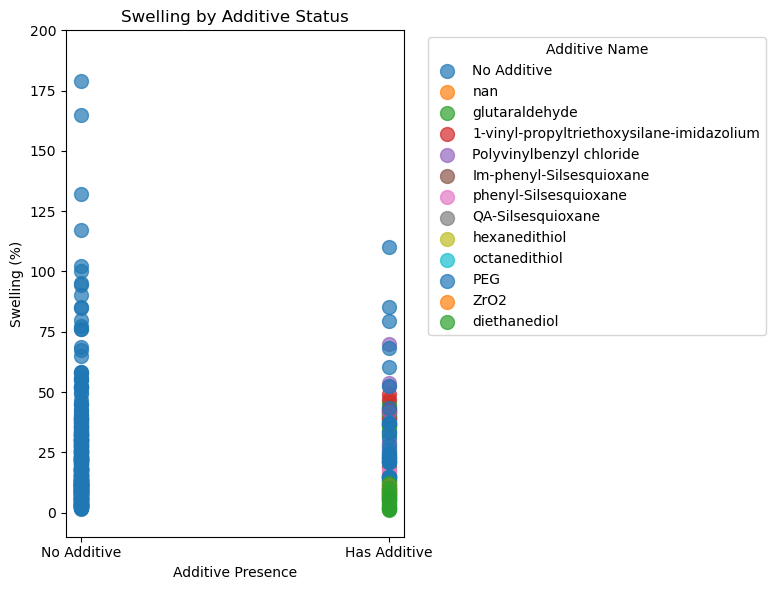

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter to only Swelling data
swelling_df = df[df['prop'] == 'Swelling(%)'].copy()

# Define categorical variable for plotting on the x-axis
swelling_df['AdditiveStatus'] = np.where(swelling_df['has_additive'], 'Has Additive', 'No Additive')

# Create label for additives
swelling_df['AdditiveLabel'] = swelling_df.apply(
    lambda row: 'No Additive' if not row['has_additive'] else str(row['additive_name_1']), axis=1
)

# Unique additive labels and color map
unique_additives = swelling_df['AdditiveLabel'].unique()
color_map = {name: plt.cm.tab10(i % 10) for i, name in enumerate(unique_additives)}

# Map AdditiveStatus to closer positions
x_map = {'No Additive': 0, 'Has Additive': 0.3}

plt.figure(figsize=(8, 6))

# Plot each additive category separately
for label in unique_additives:
    subset = swelling_df[swelling_df['AdditiveLabel'] == label]
    x_vals = subset['AdditiveStatus'].map(x_map)
    plt.scatter(x_vals, subset['value'], c=[color_map[label]], label=label, alpha=0.7, s=100)

# Set x-axis ticks
plt.xticks([0, 0.3], ['No Additive', 'Has Additive'])

plt.ylim([-10, 200])

# Adjust y-axis label and range as needed
plt.xlabel('Additive Presence')
plt.ylabel('Swelling (%)')
plt.title('Swelling by Additive Status')

plt.legend(title='Additive Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



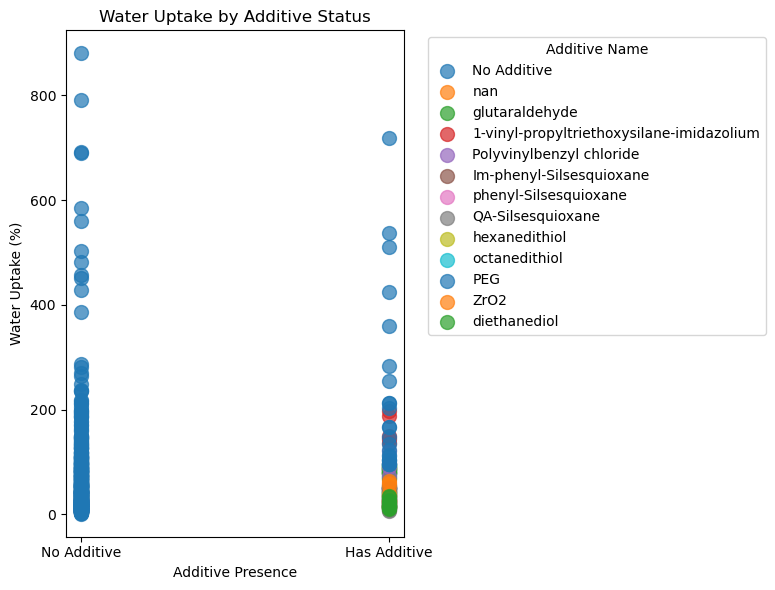

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Filter to only Water Uptake data
water_uptake_df = df[df['prop'] == 'WU(wt%)'].copy()

# Define categorical variable for plotting on the x-axis
water_uptake_df['AdditiveStatus'] = np.where(water_uptake_df['has_additive'], 'Has Additive', 'No Additive')

# Create label for additives
water_uptake_df['AdditiveLabel'] = water_uptake_df.apply(
    lambda row: 'No Additive' if not row['has_additive'] else str(row['additive_name_1']), axis=1
)

# Unique additive labels and color map
unique_additives = water_uptake_df['AdditiveLabel'].unique()
color_map = {name: plt.cm.tab10(i % 10) for i, name in enumerate(unique_additives)}

# Map AdditiveStatus to closer positions
x_map = {'No Additive': 0, 'Has Additive': 0.3}

plt.figure(figsize=(8, 6))

# Plot each additive category separately
for label in unique_additives:
    subset = water_uptake_df[water_uptake_df['AdditiveLabel'] == label]
    x_vals = subset['AdditiveStatus'].map(x_map)
    plt.scatter(x_vals, subset['value'], c=[color_map[label]], label=label, alpha=0.7, s=100)

# Set x-axis ticks
plt.xticks([0, 0.3], ['No Additive', 'Has Additive'])

# Adjust y-axis label and range as needed
plt.xlabel('Additive Presence')
plt.ylabel('Water Uptake (%)')
plt.title('Water Uptake by Additive Status')

plt.legend(title='Additive Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

